# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [23]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [56]:
A, b = main.spare_matrix_Abt(50, 12)

#1
A_square, b_square = main.square_from_rectan(A, b)
x = np.linalg.solve(A_square, b_square)
print(x, "\n")
residuum1 = main.residual_norm(A_square, x,  b_square)
print(residuum1, "\n")


[ 9.99999974e-01  7.58007725e-06 -8.00028383e+00  4.16142769e-03
  1.06350033e+01  1.42016479e-01 -6.09002552e+00  7.37605224e-01
  7.31350261e-01  7.15476403e-01 -6.70528222e-01  1.41573277e-01] 

4.249355965379808e-14 



In [57]:
%%timeit -n 10 -r 10
x = np.linalg.solve(A_square, b_square)
residuum1 = main.residual_norm(A_square, x,  b_square)

44.6 µs ± 11.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [58]:
%%memit
x = np.linalg.solve(A_square, b_square)
residuum1 = main.residual_norm(A_square, x,  b_square)

peak memory: 121.40 MiB, increment: 0.01 MiB


In [59]:

#2
m = np.linalg.lstsq(A, b, rcond=None)[0]
print(m, "\n")
residuum2 = main.residual_norm(A, m, b)
print(residuum2, "\n")


[ 1.00000000e+00 -4.22743385e-07 -7.99998124e+00 -3.18763318e-04
  1.06694308e+01 -1.38202899e-02 -5.64707562e+00 -7.53160319e-02
  1.69360697e+00  6.03210332e-03 -3.74241701e-01  8.80405757e-02] 

7.999154129059378e-09 



In [60]:
%%timeit -n 10 -r 10
m = np.linalg.lstsq(A, b, rcond=None)[0]
residuum2 = main.residual_norm(A, m, b)

219 µs ± 75.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [61]:
%%memit
m = np.linalg.lstsq(A, b, rcond=None)[0]
residuum2 = main.residual_norm(A, m, b)

peak memory: 121.42 MiB, increment: 0.00 MiB


In [62]:

#3
Q, R = np.linalg.qr(A)
x = sp.linalg.solve_triangular(R, np.dot(np.transpose(Q), b))
print(x, "\n")
residuum3 = main.residual_norm(R, x, Q.T@b)
print(residuum3, "\n")


[ 1.00000000e+00 -4.22743397e-07 -7.99998124e+00 -3.18763328e-04
  1.06694308e+01 -1.38202903e-02 -5.64707562e+00 -7.53160342e-02
  1.69360697e+00  6.03210127e-03 -3.74241700e-01  8.80405756e-02] 

1.5859737849776556e-15 



In [63]:
%%timeit -n 10 -r 10
Q, R = np.linalg.qr(A)
x = sp.linalg.solve_triangular(R, np.dot(np.transpose(Q), b))
residuum3 = main.residual_norm(R, x, Q.T@b)


237 µs ± 90.1 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [64]:
%%memit
Q, R = np.linalg.qr(A)
x = sp.linalg.solve_triangular(R, np.dot(np.transpose(Q), b))
residuum3 = main.residual_norm(R, x, Q.T@b)

peak memory: 121.42 MiB, increment: 0.00 MiB


In [65]:


#4
[U, s, V] = np.linalg.svd(A, full_matrices = False)
S = np.diag(s)
c = V.T @ np.linalg.solve(S, U.T@b)
print(c, "\n")
residuum4 = main.residual_norm(A, c, b)
print(residuum4, "\n")


[ 1.00000000e+00 -4.22743383e-07 -7.99998124e+00 -3.18763328e-04
  1.06694308e+01 -1.38202903e-02 -5.64707562e+00 -7.53160342e-02
  1.69360697e+00  6.03210118e-03 -3.74241700e-01  8.80405755e-02] 

7.999155472630631e-09 



In [66]:
%%timeit -n 10 -r 10
[U, s, V] = np.linalg.svd(A, full_matrices = False)
S = np.diag(s)
c = V.T @ np.linalg.solve(S, U.T@b)
residuum4 = main.residual_norm(A, c, b)


220 µs ± 52.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [67]:
%%memit
[U, s, V] = np.linalg.svd(A, full_matrices = False)
S = np.diag(s)
c = V.T @ np.linalg.solve(S, U.T@b)
residuum4 = main.residual_norm(A, c, b)

peak memory: 121.43 MiB, increment: 0.00 MiB


In [ ]:
# Biorac pod uwage wykorzystanie pamieci kazdy sposob okazal sie zwrocic podobne wartosci
# Najszybsza metoda byla metoda pierwsza
# Najlepsza jakosc wynikow otrzymalismy z metody trzeciej

***Zadanie 2***

Utwórz dwa wektory $x_1$ oraz $x_2$ opiujące dochód i wydatki pewnego gospodarstwa.

Dochody = [210, 270, 290, 310, 370, 400, 450, 480, 510, 520]

Wydatki = [140, 190, 250, 270, 290, 310, 340, 360, 420, 390]

Utwórz regresję liniową zależności wydatków od dochodów.

Jaki jest błąd uzyskanej prostej względem danych? Czy jest możliwość uzyskania lepszego wyniku?

W celu wyznaczenia współczynników wykorzystaj niniejszą informację https://en.wikipedia.org/wiki/Simple_linear_regression


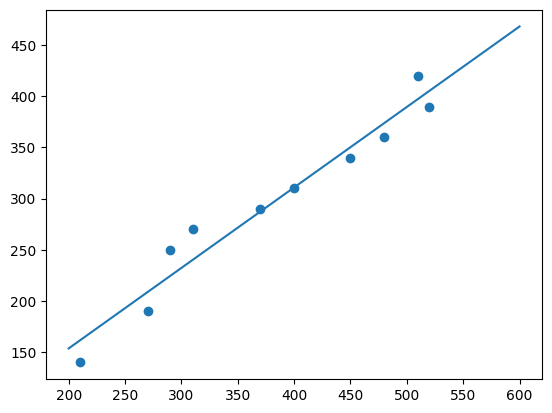

In [68]:
x1 = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])
x2 = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])

x1_mean = np.mean(x1)
x2_mean = np.mean(x2)

licz_a = 0
mian_a = 0
for i in range(len(x1)):
    licz_a += (x1[i] - x1_mean)*(x2[i] - x2_mean)
    mian_a += (x1[i]- x1_mean)**2
a = licz_a/mian_a

b = x2_mean - (a * x1_mean)

x = np.linspace(200, 600, 1000)
y = np.zeros(1000)

for i in range(len(x)):
    y[i] = a*x[i] + b


plt.scatter(x1, x2)
plt.plot(x, y)

***Zadanie 3***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [69]:
#1
mu, sigma = 0, 1
x1 = np.random.normal(mu, sigma, (100, 1))
x2 = np.random.normal(mu, sigma, (100, 1))
epsilon = np.random.normal(mu, sigma, (100, 1))

#2
y = 2 + x1 - 0.5*x2 + epsilon

#3
ones = np.ones((100, 1))
x1_ones = np.concatenate((ones, x1), axis = 1)
x2_ones = np.concatenate((ones, x2), axis = 1)
x1x2_ones = np.concatenate((ones, x1, x2), axis = 1)

pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

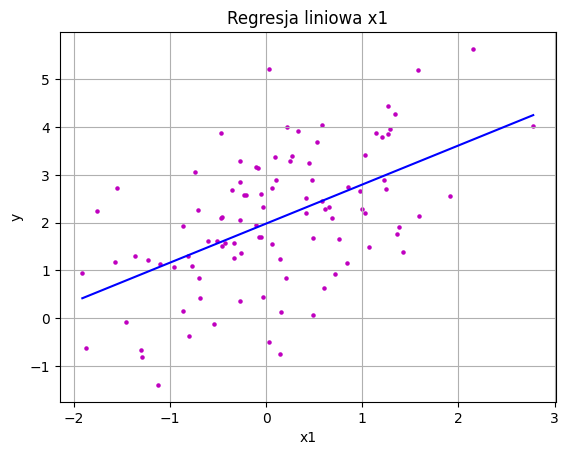

In [70]:

#4
q, r = np.linalg.qr(x1_ones)
beta = sp.linalg.solve_triangular(r, q.T@y)

y_app = beta[0] + beta[1] * pred1

plt.scatter(x1, y, s = 5, c = "m")
plt.plot(pred1,y_app, "b")
plt.title("Regresja liniowa x1")
plt.xlabel("x1")
plt.ylabel("y")
plt.grid()
plt.show()



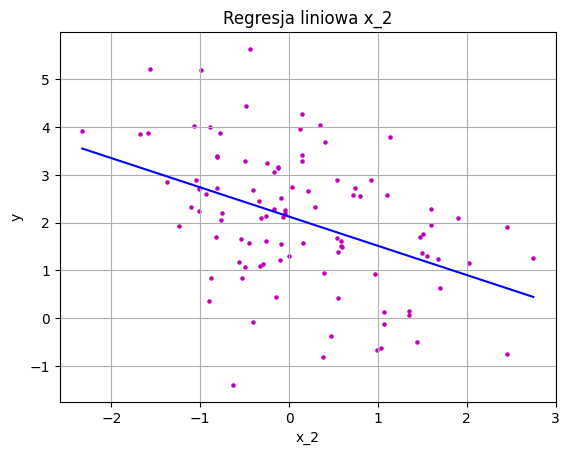

In [71]:
q, r = np.linalg.qr(x2_ones)
beta = sp.linalg.solve_triangular(r, q.T@y)

y_app2 = beta[0] + beta[1] * pred2

plt.scatter(x2, y, s = 5, c = "m")
plt.plot(pred2,y_app2, "b")
plt.title("Regresja liniowa x_2")
plt.xlabel("x_2")
plt.ylabel("y")
plt.grid()
plt.show()


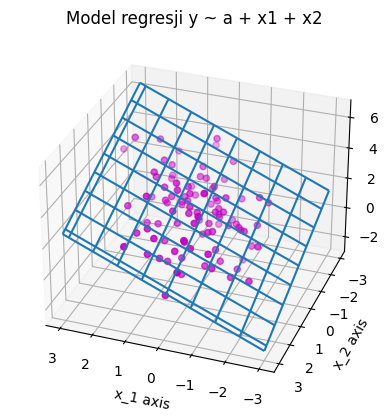

In [72]:
q, r = np.linalg.qr(x1x2_ones)
beta = sp.linalg.solve_triangular(r, q.T@y)
figure = plt.figure()
ax = figure.add_subplot(111, projection = '3d')
X = x1
Y = x2
Z = y
ax.scatter(X, Y, Z, c = 'm', marker = "o")
ax.set_xlabel("x_1 axis")
ax.set_ylabel("x_2 axis")
ax.set_zlabel("y axis")
plt.title("Model regresji y ~ a + x1 + x2")
plt.grid()
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = beta[0] + beta[1] * X + beta[2] *  Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)
ax.view_init(30,110)
plt.show()

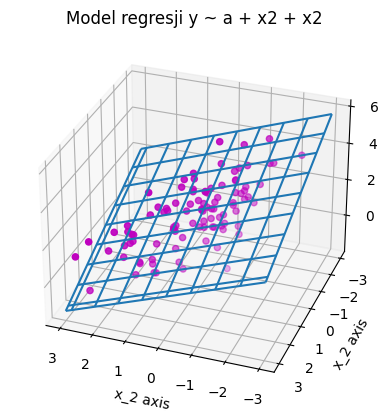

In [73]:
q, r = np.linalg.qr(x2_ones)
beta = sp.linalg.solve_triangular(r, q.T@y)
figure = plt.figure()
ax = figure.add_subplot(111, projection = '3d')
X = x2
Y = x2
Z = y
ax.scatter(X, Y, Z, c = 'm', marker = "o")
ax.set_xlabel("x_2 axis")
ax.set_ylabel("x_2 axis")
ax.set_zlabel("y axis")
plt.title("Model regresji y ~ a + x2 + x2")
plt.grid()
X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = beta[0] + beta[1] * X + beta[1] *  Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)
ax.view_init(30,110)
plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)